In [1]:
# from alpha_vantage.timeseries import TimeSeries
# from alpha_vantage.techindicators import TechIndicators
# from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
stocks_df=pd.read_csv("stock_export.csv")
stocks_df=pd.DataFrame(stocks_df)
stocks_df.head()

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.09,173.15,...,180.47,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.28,52.08,...,47.62,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.66,83.74,...,85.36,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.75,85.21,...,89.06,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.22,189.70,...,207.66,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51


In [ ]:
date_df=stocks_df.set_index(['Symbol'])
date_df=date_df.dropna()
date_df=date_df.drop(['Unnamed: 0', 'Sector', 'Name'], axis=1)
date_df.head()

In [ ]:
date_df=date_df.swapaxes("index", "columns") 
date_df=date_df.reset_index()
date_df=date_df.rename(columns={"index": "date_range"})
date_df.head()

In [ ]:
date = date_df.index.astype('O')

In [ ]:
x=date_df["date_range"]
y=date_df["MMM"]
fig, ax=plt.subplots()
ax.plot(x,y);
plt.title("3M Weekly Close Values (October 4,2019-March 13,2020)")
plt.xlabel("Date Range")
plt.ylabel("Close Values")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.tight_layout()
plt.show()

In [ ]:
cleaned_stocks=stocks_df.dropna()
cleaned_stocks=cleaned_stocks.drop(['Unnamed: 0'], axis=1)
sector_df=cleaned_stocks.groupby("Sector").mean()
sector_df.head()

In [ ]:
sector_df=sector_df.swapaxes("index", "columns") 
sector_df=sector_df.rename(index={'Sector': 'date_range'})
sector_df.index.name = 'date_range'
sector_df.head()

In [ ]:
df=sector_df.reset_index()


In [ ]:
x_axis=df["date_range"]
y_1=df["Consumer Discretionary"]
y_2=df["Financials"]
y_3=df["Health Care"]
y_4=df["Industrials"]
y_5=df["Information Technology"]
y_6=df["Materials"]
y_7=df["Real Estate"]
y_8=df["Utilities"]
fig,ax=plt.subplots()
consumer_discretionary=plt.plot(x_axis, y_1, label="Consumer Disrectionary", color="gold")
fin=plt.plot(x_axis, y_2, label="Financials", color="coral")
hc=plt.plot(x_axis, y_3, label="Health Care", color="cornflowerblue")
ind=plt.plot(x_axis, y_4, label="Industrials", color="green")
it=plt.plot(x_axis, y_5, label="Information Technology", color="yellowgreen")
mat=plt.plot(x_axis, y_6, label="Materials", color="magenta")
re=plt.plot(x_axis, y_7, label="Real Estate",color="teal")
ut=plt.plot(x_axis, y_8, label="Utilities", color="purple")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.tight_layout()
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Average Close Values by Sector (October 4,2019-March 13,2020)")
plt.xlabel("Date Range")
plt.ylabel("Average Weekly Close Value")
plt.show()


In [ ]:
# place holder until we get more data
consumer_df=stocks_df.loc[stocks_df["Sector"]=="Consumer Disrectionary"]
consumer_df=consumer_df.dropna()
consumer_df

In [3]:
fin_df=stocks_df.loc[stocks_df["Sector"]=="Financials"]
fin_df=fin_df.dropna()
fin_df=fin_df.drop(['Unnamed: 0', 'Sector', 'Symbol'], axis=1)
fin_df=fin_df.rename(columns={'Name': 'date_range'})
fin_df=fin_df.set_index('date_range')
fin_df=fin_df.swapaxes("index", "columns")
fin_df['Average Close'] = fin_df.mean(axis=1)
fin_df['MA_5'] = fin_df["Average Close"].rolling(window=5).mean()
fin_df['MA_10'] = fin_df["Average Close"].rolling(window=10).mean()
fin_df

date_range,Affiliated Managers Group Inc,AFLAC Inc,Average Close,MA_5,MA_10
2019-10-04,76.47,52.10,64.285,NaN,NaN
2019-10-11,75.97,52.44,64.205,NaN,NaN
2019-10-18,74.58,52.71,63.645,NaN,NaN
2019-10-25,77.34,53.26,65.300,NaN,NaN
2019-11-01,82.15,53.61,67.880,65.063,NaN
2019-11-08,86.86,54.14,70.500,66.306,NaN
2019-11-15,85.00,54.40,69.700,67.405,NaN
2019-11-22,84.41,53.99,69.200,68.516,NaN
2019-11-29,85.37,54.84,70.105,69.477,NaN
2019-12-06,85.43,52.99,69.210,69.743,67.4030


In [4]:
fin_df=fin_df.reset_index()
fin_df=fin_df.rename(columns={'index': 'date_range'})

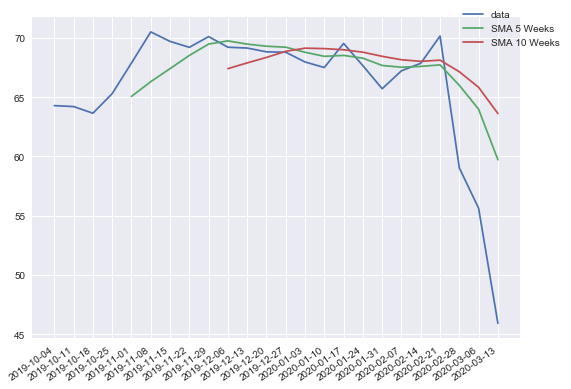

In [8]:
date_range=fin_df["date_range"]
avg_close=fin_df["Average Close"]
ma_5=fin_df["MA_5"]
ma_10=fin_df["MA_10"]
fig,ax=plt.subplots()
ax.plot(date_range,avg_close, label="data")
ax.plot(date_range, ma_5, label="SMA 5 Weeks")
ax.plot(date_range, ma_10, label="SMA 10 Weeks")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.show()

In [ ]:
healthcare_df=stocks_df.loc[stocks_df["Sector"]=="Health Care"]
healthcare_df=healthcare_df.dropna()
healthcare_df=healthcare_df.drop(['Unnamed: 0', 'Sector', 'Symbol'], axis=1)
healthcare_df=healthcare_df.rename(columns={'Name': 'date_range'})
healthcare_df=healthcare_df.set_index('date_range')
healthcare_df=healthcare_df.swapaxes("index", "columns")
healthcare_df        

In [ ]:
healthcare_df ['Average Close'] = healthcare_df .mean(axis=1)
healthcare_df .loc['Average Close'] = healthcare_df .mean()
healthcare_df 

In [ ]:
healthcare_df ['MA'] = healthcare_df ["Average Close"].rolling(window=5).mean()
healthcare_df 

In [ ]:
industrials_df=stocks_df.loc[stocks_df["Sector"]=="Industrials"]
industrials_df=industrials_df.dropna()
industrials_df  

In [ ]:
it_df=stocks_df.loc[stocks_df["Sector"]=="Information Technology"]
it_df=it_df.dropna()
it_df  

In [ ]:
materials_df=stocks_df.loc[stocks_df["Sector"]=="Materials"]
materials_df=materials_df.dropna()
materials_df  

In [ ]:
realestate_df=stocks_df.loc[stocks_df["Sector"]=="Real Estate"]
realestate_df=realestate_df.dropna()
realestate_df  

In [ ]:
utilities_df=stocks_df.loc[stocks_df["Sector"]=="Utilities"]
utilities_df=utilities_df.dropna()
utilities_df  